<a id="top"><a>
# **6.3  Softening and fracture energy**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=643794)

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

With the knowledge how to evaluate the energy flow within the structural volume introduced in the notebook [6.2](6_2_Energy_released_in_pullout_constant_bond_and_rigid_matrix.ipynb#top) we have a new tool to interpret the 
response of a structural element.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

Based on energetic characterization of the material behavior we can address the key feature of brittle materials, namely the local nature of energy dissipation within a small volume of the structure. We will use the global evaluation of the energy dissipation implemented in the finite-element model to follow its evolution during the loading. This will allow us to relate the dissipated energy to the macroscopically observed change of the specimen, namely to the interface failure. In simple terms, we want to know how much energy is needed to completely damage the whole interface. Knowing this, we can say how much energy is needed to completely damage a unit area of the interface, which represents an important material characteristic of brittle materials, the **fracture energy**.

**Correspondence between fracture and damage**:
Our goal is to prepare the platform for the general explanation of the correspondence between the theoretical concepts of fracture mechanics, i.e. the energetic characterization of the material disintegration, and between the strain-softening types of models used in the finite element simulation of brittle materials exhibiting cracking.

# **Energetic analysis of the CFRP pullout**

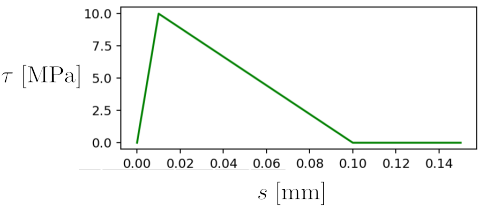

**Softening, stress concentration, discontinuity:**
In this Tour we focus on the material behavior exhibiting softening. 
This means that the bond slip relation contains a descending branch as was the case e.g. in Examples describing the [CFRP pullout response](../tour5_damage_bond/5_2_PO_cfrp_damage.ipynb).
Such type of material behavior leads to a stress concentration within 
a small volume of material. This volume is called a process zone. 
In case of debonding, we can observe a propagation of the process zone 
through the bond zone in response to an increasing pullout control displacement. 
Behind the process zone, a distinguished displacement jump between 
the CFRP sheet and matrix develops. 
This newly emerged discontinuity does not transfer any stress 
and can be regarded as a crack evolving along the interface 
due to shear loading. In the framework of fracture mechanics 
is referred to as a shear crack, or mode II crack.


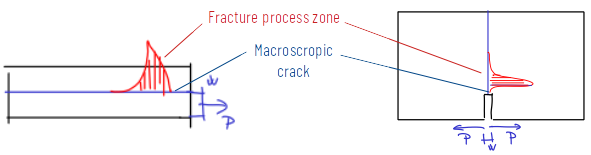

**Energy dissipation as a material property:**
The characterization of the process zone includes particularly its size and the energy dissipation associated with its propagation through the structure.
Instead of defining the material behavior in terms of the stress-strain relation, we postulate that the size of the process zone and rate of energy dissipated within it remains constant during its propagation through the structure. Thus, we regard it as a material property associated with particular material, objectively characterizing its localization process of damage into a material discontinuity, i.e. crack. As already emphasized, this kind of
description is only possible for materials exhibiting strain-softening that are denoted as brittle or quasi-brittle. Examples of such materials 
include concrete, fiber-reinforced concrete and ceramics.

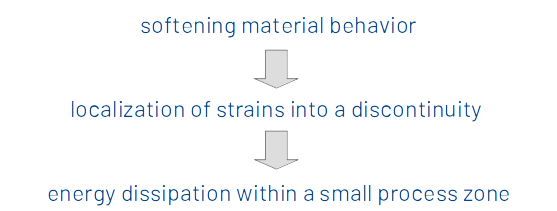

# **Simulation example**

To observe the energy dissipation during the propagation of a fracture process zone through a specimen we will first revisit the example of the pullout test with a damage function that introduces softening. 
In particular, we will describe the debonding of CFRP sheet from the concrete matrix observed in the test.

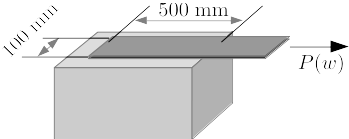

**Energy dissipation in finite-element code:** To evaluate the energy dissipation, the `bmcs` finite element solver provides the possibility to numerically integrate the work supply and the stored energy. This corresponds to the the global approach explained using the analytical example in notebook [6.1]() is used which evaluated the difference between supplied and stored energy as

$$
G(w) = \mathcal{W}(w) - \mathcal{U}(w) = \int_0^w P(w) \; \mathrm{d}w - \frac{1}{2} \int_\Omega E \boldsymbol{\varepsilon}_\mathrm{el}(w) : \boldsymbol{\varepsilon}_\mathrm{el}(w) \; \mathrm{d}x.
$$

In the finite-element implementation, the work supply $\mathcal{W}$ is obtained as a numerical integral of the simulated pullout curve $P(w)$ over the control displacement within the range $(0, w)$, and the stored energy $\mathcal{U}$ is evaluated as a spatial integral over the finite-element discretization. 

**Generalization for arbitrary loading histories:** Note that this expression implicitly assumes a monotonically growing control displacement $w$. To allow for cyclic loading scenarios, let us generalize this expression by defining the control displacement as a function $w(t)$ where $t$ represents a monotonically increasing pseudo time. With this extension, arbitrary loading histories can be included. Then, the global energy evaluation reads

$$
G(t) = \mathcal{W}(t) - \mathcal{U}(t) = \int_0^t P(w(t)) \dfrac{\mathrm{d}w}{\mathrm{d}t} \; \mathrm{d}t - \frac{1}{2} \int_\Omega \sigma(w(t)) \cdot \varepsilon_\mathrm{el}(w(t)) \; \mathrm{d}x.
$$

The evaluation of the energy dissipation available in the `PullOutModel1D` for any kind of material model can be readily used to evaluate the energy dissipation during the loading history. To show the profile of the energy dissipation during the debonding process with a bond slip law exhibiting softening behavior, let us again run the preconfigured finite element analysis of the CFRP pullout test. The specification of the 
test setup parameters and the bond-slip law has been provided in notebook [3.1](../tour3_nonlinear_bond/3_1_nonlinear_bond.ipynb#cfrp_bond_slip). To demonstrate the energy dissipation using a large interface area, we will use a longer length of bond zone, 500 mm. The perimeter will remain the same, i.e. 100 mm.

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from bmcs_cross_section.pullout import PullOutModel1D
po_cfrp = PullOutModel1D(n_e_x=300, w_max=5) # mm 
po_cfrp.geometry.L_x=500 # [mm]
po_cfrp.time_line.step = 0.02
po_cfrp.cross_section.trait_set(A_m=400*200, A_f=100*0.11, P_b=100);
po_cfrp.material_model='damage'
po_cfrp.material_model_.trait_set(E_m=28000, E_f=230000, E_b=250, s_max=.4)
po_cfrp.material_model_.D_alg=1 # use algorithmic stiffness
po_cfrp.material_model_.omega_fn='fracture-energy'
po_cfrp.material_model_.omega_fn_.trait_set(kappa_0=0.0001, G_f=1.19);

To inspect the input data given above let us render the material model showing the bond slip law first

In [12]:
po_cfrp.material_model_.interact()

The simulation can now be started and the results are presented using the rendered model user interface.

In [13]:
po_cfrp.run()
po_cfrp.interact()


The bottom left diagram shows the work supply $\mathcal{W}(t)$ as a black solid line and the stored energy $\mathcal{U}(t)$ as the green line. The difference between the two represents the dissipated energy $G(t)$ during the debonding process. The comparison between the pullout curve and the energy curves reveals 

 1. that for bond softening, the pullout curve remains at the constant load level during the debonding process, 
 2. that both the stored and dissipated energy grow during the debonding process.

**How much energy was needed to make the interface completely stress free?** The failure of the pullout indicated by the drop down of the pullout curve to zero represents the state at which the whole energy available in the interface has been lost. What followed was the release of the energy stored in the CFRP sheet has been released by unloading, i.e. the green curve dropped to zero. Thus, the total energy $G_\mathrm{total}$ released within the interface layer can be evaluated at the time at which the peak of $\mathcal{U}$ which was reached at
$$
 t_\mathrm{argmax} = \mathrm{argmax}(\mathcal{U})
$$
so that 
$$
G_\mathrm{total} = \mathcal{W}(t_\mathrm{argmax}) - \mathcal{U}(t_\mathrm{argmax})
$$ 

<div style="background-color:lightgray;text-align:left"> <img src="../icons/warning.png" alt="Verify" width="50" height="50">
    &nbsp; &nbsp; <b>Important: the amount of stored energy prior to failure</b> </div> 

**When designing an experiment or a structural members always watch out how much elastic energy is stored in the structure prior to the failure.** Ignoring this can lead to unforeseen, uncontrolled failure event which is not only brittle but may be highly **explosive**.  

# **Quantification and verification of dissipated energy**

Even though the value of $G_\mathrm{total}$ could be extracted from the graphs presented in the above simulation, let us quantify them by accessing the output data of the simulation. The `history` attribute includes the arrays of stored, supplied and dissipated energy as `W_t`, `U_bar_t`, and `G_t`, respectively. Then, because the geometry was specified in $\mathrm{mm}$, the above formulas deliver the value of $G_\mathrm{total}$ in $\mathrm{[Nmm]}$

In [14]:
t_idx = np.argmax(po_cfrp.history.U_bar_t)
G_total = po_cfrp.history.G_t[t_idx]
G_total # Nmm

52784.20045086243

Knowing the total energy dissipated within the interface, we can now determine the energy needed to make a unit area of the interface stress free, i.e.
$$
G_\mathrm{F} = \dfrac{G_\mathrm{total}}{A_\mathrm{b}} 
$$
The total interface area $A_\mathrm{b} = L_\mathrm{b} P_\mathrm{b}$ is extracted from the model as follows

In [15]:
A_b = (po_cfrp.geometry.L_x * po_cfrp.cross_section.P_b)
A_b # mm^2

50000.0

Rendering the value of $G_\mathrm{F}$ in $\mathrm{[J/mm^2]} = \mathrm{[N/mm]}$

In [16]:
G_F = G_total / A_b
G_F # N/mm

1.0556840090172486

This number is relatively close to the value of $G_\mathrm{f} = 1.19 \; \mathrm{[N/mm]}$, the input parameter of the [damage function introduced in notebook 5.1](../tour5_damage_bond/5_1_Introspect_Damage_Evolution_Damage_initiation.ipynb#omega_fn_G_f) describing the deterioration of the interface. This parameter has been introduced as the area below the stress-slip curve which represents the energy to completely damage a unit area of the material so that it is stress free. Thus, the equivalence of $G_\mathrm{F}$ calculated globally by evaluating the structural response and $G_\mathrm{f}$ is intentional and demonstrates the role and purpose of the energy dissipation as a material parameter.

**However, why are they not equal?** The obtained values, i.e. $G_\mathrm{F} = 1.05 \; \mathrm{[N/mm]}$ and $G_\mathrm{f} = 1.19 \; \mathrm{[N/mm]}$ so that the globally evaluated dissipated energy is smaller than the prescribed fracture energy 
$$
 G_\mathrm{F} < G_\mathrm{f}.
$$
The reason for this discrepancy can be explained by looking at the profile of shear flow during the debonding
right before the failure, i.e.

In [8]:
po_cfrp.history.t_slider = 0.9
po_cfrp.history.interact()

Apparently, the last 50-70 mm of the bond zone were still not stress free when the pullout force dropped down so that the part of the area which debonded in a stable way to a zero shear stress was in fact smaller than the total area of the interface $A_\mathrm{b}$. This explains why $G_\mathrm{F}$ is 10% smaller than $G_\mathrm{f}$. The remaining bond length debonded in an unstable way since the elastic energy stored in the fiber initiated its rapid unloading which lead to an immediate debonding of the last 50 mm without increasing the control displacement $w$.

As a consequence, we can expect that, **the larger the debonding process zone relative to the bond length, the larger the discrepancy between $G_\mathrm{f}$ and $G_\mathrm{F}$**.

<div style="background-color:lightgray;text-align:left"> <img src="../icons/question_puzzle.png" alt="Verify" width="50" height="50">
    &nbsp; &nbsp; <b>Try to verify this statement by changing the parameters</b> </div> 

Evaluate the ratio between

$$
\dfrac{G_\mathrm{total}}{G_\mathrm{f} p L_\mathrm{b}} \rightarrow 1 \;\;\; \mathrm{for} \;\;\; L_\mathrm{b} \rightarrow \infty
$$

for several selected values of $L_\mathrm{b}$. Observe that for small $L_\mathrm{b}$ the discrepancy becomes larger.

<a id="G_F_measured"></a>
# **Experimental identification of fracture energy**

In spite of the observed difference between $G_\mathrm{F}$ and $G_\mathrm{f}$, the described concept of 
globally evaluated released energy and its normalization with respect to the observed localized discontinuity  represents an efficient characterization procedure delivering an estimate of fracture energy needed to to produce a unit area of a stress free crack or debonding zone. Fracture energy is a fundamental characteristic required for a realistic modeling and assessment of concrete structures. As a consequence, the possibility to evaluate $G_\mathrm{F}$ from the force-displacement curve as an estimate of $G_\mathrm{f}$ is exploited in standardized experimental procedures for the identification of fracture energy.

In the studied case of the CFRP sheet pullout, the failure included an unstable release of elastically stored energy $\mathcal{U}$ so that it was necessary to subtract it from the total energy $\mathcal{W}$ at the point of failure. It is possible to design the failure process in such a way that the failure process is stable and can release the stored energy in parallel to the stable process of energy dissipation. In this case, the identification of energy dissipation is even simpler than in the described case. The concept of such a test design will be studied in the next tour addressing the crack propagation through a bended specimen as described in a more detail in notebook [7.2](../tour7_cracking/7_2_fracture_energy_ident.ipynb#rilem_notched_bending_test). 

<div style="background-color:lightgray;text-align:left"> <img src="../icons/exercise.png" alt="Run" width="50" height="50">
    &nbsp; &nbsp; <a href="../exercises/X0601 - Energy supply and dissipated energy.pdf"><b>Exercise X0601:</b></a> <b>Energy supply, storage and dissipation</b> 
<a href="https://moodle.rwth-aachen.de/mod/page/view.php?id=551850"><img src="../icons/bmcs_video.png" alt="Run" height="130"></a>
</div>

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour6_energy/6_2_Energy_released_in_pullout_constant_bond_and_rigid_matrix.ipynb#top">6.2 Frictional pullout and energy dissipation</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour7_cracking/7_1_bending3pt_2d.ipynb#top">7.1 Crack propagation</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 